<a href="https://colab.research.google.com/github/smomtahe/Mesh_Ablation_Open3D_PointCloud/blob/main/plot_mesh_with_visible_ablation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A basic 3D scatter plot of the heart mesh.

In [6]:
# Install necessary libraries
!pip install vtk matplotlib numpy pandas

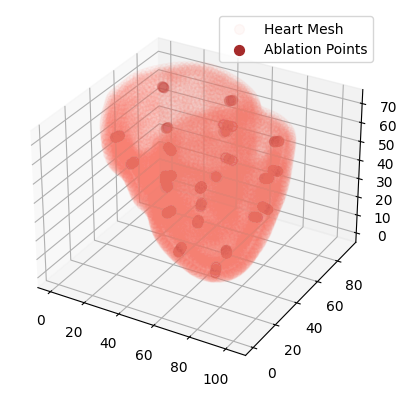

In [34]:
# Import necessary libraries
import vtk  # for processing and visualizing data with VTK files
from vtk.util.numpy_support import vtk_to_numpy  # to convert VTK arrays to NumPy arrays
import numpy as np  # for efficient array operations
import matplotlib.pyplot as plt  # for plotting
import pandas as pd  # for reading and handling CSV files

# Define a function to load and process VTK file
def load_vtk(filename):
    reader = vtk.vtkUnstructuredGridReader()  # create a VTK reader for unstructured grids
    reader.SetFileName(filename)  # set the file name to read
    reader.Update()  # update the reader to process the file contents
    mesh = reader.GetOutput()  # get the output of the reader which is the mesh data

    points = mesh.GetPoints()  # get the points from the mesh
    array = points.GetData()  # get the underlying data from the points as a VTK array
    numpy_points = vtk_to_numpy(array)  # convert the VTK array to a NumPy array for further use

    return numpy_points  # return the NumPy array of points

# Define a function to load ablation points from a CSV file
def load_ablation_points(filename):
    df = pd.read_csv(filename)  # read the CSV file into a DataFrame
    # Extract columns 'Points:0', 'Points:1', 'Points:2' which contain the x, y, z coordinates
    return df[['Points:0', 'Points:1', 'Points:2']].values

# Define a function to plot the heart mesh and ablation points
def plot_mesh_with_visible_ablation(mesh_points, ablation_points):
    fig = plt.figure()  # create a new figure for plotting
    ax = fig.add_subplot(111, projection='3d')  # add a 3D subplot to the figure

    # Scatter plot for heart mesh using a softer color 'salmon'
    # Adjust the transparency with alpha and size with s
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], mesh_points[:, 2], c='salmon', alpha=0.05, s=50, marker='o', label='Heart Mesh')

    # Scatter plot for ablation points using a bold color 'brown'
    # The size of the ablation points is set to be equal to the size of the mesh points
    ax.scatter(ablation_points[:, 0], ablation_points[:, 1], ablation_points[:, 2], c='brown', s=50, marker='o', label='Ablation Points')

    ax.legend()  # add a legend to the plot
    plt.show()  # display the plot

# Load heart mesh data using the load_vtk function
heart_points = load_vtk('/content/heart_mesh.vtk')

# Load ablation points data using the load_ablation_points function
ablation_points = load_ablation_points('/content/points.csv')

# Plot the heart mesh with more visible ablation points using the plotting function
plot_mesh_with_visible_ablation(heart_points, ablation_points)


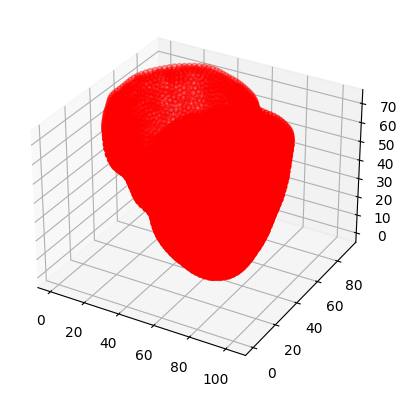

In [5]:
# Import libraries
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import matplotlib.pyplot as plt

# Function to load and process VTK file
def load_vtk(filename):
    reader = vtk.vtkUnstructuredGridReader()
    reader.SetFileName(filename)
    reader.Update()
    mesh = reader.GetOutput()

    points = mesh.GetPoints()
    array = points.GetData()
    numpy_points = vtk_to_numpy(array)

    return numpy_points

# Function to plot the heart mesh
def plot_mesh(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o')
    plt.show()

# Load heart mesh data
heart_points = load_vtk('/content/heart_mesh.vtk')

# Plot the heart mesh
plot_mesh(heart_points)
